## Машинное обучение 
### Факультет математики НИУ ВШЭ, 2019-20 учебный год

_Илья Щуров, Соня Дымченко, Руслан Хайдуров, Александр Каган, Павел Балтабаев_

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_на_матфаке_2020)

## Домашнее задание №2

Фамилия и имя студента: _Николенко Александр_

_Комментарий_: Техать такую домашку в `.ipynb` очень неудобно, было бы удобнее теор.домашку делать в формате письменного листка, который можно сдавать либо написанным ручкой на бумаге, либо затеханном в pdf'ку.
Спасибо!

### Определение: равномерное распределение
Абсолютно непрерывная случайная величина $X$ называется *равномерно распределённой* на отрезке $[a, b]$, если её плотность задаётся функцией 
$$p_{X}(x)=\frac{1}{b-a}\mathbb I_{[a, b]}(x),$$
где $\mathbb I_{[a, b]}$ — индикаторная функция отрезка $[a, b]$. Пишут:

$$\newcommand{\Uniform}{\mathop{\mathrm{Uniform}}}
X\sim \Uniform(a, b)$$

### Задача 1 (10 баллов)
Пусть $X \sim \Uniform(a, b)$, $b>a>0$, $Y=X^2$.

1. Найти плотность $p_Y(y)$. Является ли она ограниченной?
2. Пусть $y_1, \ldots, y_n$ — некоторая выборка, порождённая случайной величиной $Y$. Придумать какую-нибудь состоятельную оценку для параметра $a$ по этой выборке.
3. Является ли придуманная вами оценка несмещённой? (Подсказка: возьмите, например, $n=1$.)

**Решение**

1.
Для нахождение плотности, сначала найдем функцию распределения:
$$
F_Y(y) = \mathbb{P} (Y \leq y) = \mathbb{P} (-\sqrt{y} \leq X \leq \sqrt{y}) = \int_{-\sqrt{y}}^{\sqrt{y}} \frac{1}{b-a} \mathbb{I}_{[a,b]}(x) dx = \begin{cases}
\frac{\sqrt{y} - a}{b - a}, & \text{ если } y \in [a^2, b^2]\\
0, & \text{ иначе}
\end{cases}
$$
Тогда плотность это просто производная функции распределения:
$$
p_Y(y) = \begin{cases}
\frac{1}{2\sqrt{y} (b-a)}, & \text{ если } y \in [a^2, b^2]\\
0, & \text{ иначе}
\end{cases}
$$
Тогда, данная плотность неограниченая только при устремелении к 0.

2.
Пусть оценка на $a$ будет, естественной, как корень из минимума, то есть оценка $\hat{a}$:
$$
\hat{a}\left( y_1, \ldots, y_n \right) = \sqrt{ \min \left\{ y_1, \ldots, y_n \right\} }
$$
Проверим её *состоятельность*:
$$
\mathbb{P}(|\hat{a} - a| > \varepsilon) = \mathbb{P}\left( \sqrt{ \min \left\{ y_1, \ldots, y_n \right\} } > (\varepsilon + a) \right) = \mathbb{P}\left(  \min \left\{ y_1, \ldots, y_n \right\} > (\varepsilon + a)^2 \right) 
= \left( \mathbb{P}( y_1 > (\varepsilon + a)^2) \right)^n = \left( 1 - \mathbb{P}( y_1 \leq (\varepsilon + a)^2) \right) ^n =
$$

$$
=\left( 1 - \dfrac{\sqrt{(\varepsilon + a)^2} - a}{b-a} \right)^n 
= \left( 1 - \dfrac{\varepsilon}{b-a} \right)^n, \, \Rightarrow \, \text{ при }\, n \rightarrow \infty \quad \mathbb{P}(|\hat{a} - a| > \varepsilon) \rightarrow 0
$$


3.
Рассмотрим случай когда $n=1$:
$$
\hat{a} = \sqrt{y_1} \quad \Rightarrow \quad \mathbb{E}[\hat{a}] = \mathbb{E}[\sqrt{y_1}] = \mathbb{E}[X] = \frac{b+a}{2} \neq a \quad \Rightarrow \quad \text{Оценка -- смещённая.}
$$

###  Задача 2 (15 баллов)

Пусть 

$$
\begin{gather*}
X  \sim \Uniform(-1, 1),\\
\varepsilon \sim \Uniform(0, 1),\\
Y=X+\varepsilon X,
\end{gather*}
$$
где $\varepsilon$ независим от $X$.

1. Найти $p_{X}(x)$, $p_{Y\mid X}(y\mid x)$, $p_{X, Y}(x, y)$. Является ли эта функция ограниченной?
2. Найти $\mathbb E[Y|X=x_0]$ (это какая-то функция от числа $x_0$).
3. Найти $p_{Y}(y)$ — маргинальную плотность $y$. Проверьте, что это действительно плотность, то есть $\int_{\mathbb R}p_Y(y)dy=1$. Является ли эта функция ограниченной?
4. Как изменился бы ответ на вопрос 1, если бы $\varepsilon$ не был независим от $X$, а вычислялся по формуле: $\varepsilon = |X|$. (Проверьте, что в этом случае распределение $\varepsilon$ по-прежнему $\Uniform(0, 1)$.)

**Решение:**

1.
По определению $p_X(x)$ и $p_{\varepsilon}(t)$:
$$
    p_{X}(x)=\frac{1}{2}\mathbb I_{[-1, 1]}(x) \qquad p_{\varepsilon}(t)=\mathbb I_{[0, 1]}(t)
$$
Теперь найдем условную плотность $p_{Y|X}(y|x)$, тогда получается, что $Y = X+\varepsilon X$ -- с.в. вида: линейная функция от $\varepsilon$, а $X$ -- некоторая зафиксированная константа. Тогда плотность "новой" случайной величины $Y$, полученной как линейная функция от другой с.в. $\varepsilon$ выражается в виде:
$$
    p_{Y|X}(y|x) = \frac{1}{|x|} p_{\varepsilon}\left( \frac{y-x}{x} \right)
    = \frac{1}{|x|} \mathbb{I}_{[0,1]}\left( \frac{y-x}{x} \right) = \frac{1}{|x|} \mathbb{I}_{[x,2x]}(y)
$$
Тогда, совеместное распределение $p_{X,Y}(x,y)$:
$$
    p_{X, Y}(x,y) = p_X(x) \cdot p_{Y|X}(y|x) = \frac{1}{2} \mathbb{I}_{[-1, 1]}(x) \cdot \frac{1}{|x|} \mathbb{I}_{[x,2x]}(y) =
    \frac{1}{|2x|} \mathbb{I}_{[-1, 1]}(x) \mathbb{I}_{[x,2x]}(y)
$$

Очевидно, что:
- $p_{X}(x)=\frac{1}{2}\mathbb I_{[-1, 1]}(x)$ -- ограниченая.
- $p_{Y|X}(y|x) = \frac{1}{|x|} \mathbb{I}_{[x,2x]}(y)$ -- неограниченая, т.к. при $x \rightarrow 0$ функция уходит на бесконечность.
- $p_{X, Y}(x,y) = \frac{1}{|2x|} \mathbb{I}_{[-1, 1]}(x) \mathbb{I}_{[x,2x]}(y)$ -- неограниченная, аналогично предыдущей.

2.
Ищем условное мат.ожидание $\mathbb E[Y|X=x_0]$:
$$
    \mathbb E[Y|X=x_0] = \int_{-\infty}^{+\infty} y \cdot p_{Y|X}(y|x_0) dy = 
    \int_{-\infty}^{+\infty} y \cdot \frac{1}{|x_0|} \mathbb{I}_{[x_0,2x_0]}(y) dy =
    \frac{1}{|x_0|}  \int_{x_0}^{2 x_0} y dy = \frac{1}{|x_0|} \left( \frac{4x_0^2}{2} - \frac{x_0^2}{2} \right) =
    \frac{3 x_0^2}{2|x_0|} = \frac{3 |x_0|}{2}
$$

3.
Найдем маргинальную плотность $p_Y(y)$ из совместной $p_{X, Y}(x, y)$:
$$
p_Y(y) = \int_{-\infty}^{+\infty} p_{X, Y}(x, y) dx = 
\int_{-\infty}^{+\infty} \frac{1}{|2x|} \mathbb{I}_{[-1, 1]}(x) \mathbb{I}_{[x,2x]}(y) dx =
\int_{-1}^{+1} \frac{1}{|2x|} \mathbb{I}_{[x,2x]}(y) dx = 
\int_{-1}^{0} \frac{-1}{2x} \mathbb{I}_{[y/2,y]}(x) dx + \int_{0}^{+1} \frac{1}{2x} \mathbb{I}_{[y/2,y]}(x) dx = (1) + (2)
$$

Сначала посчитаем первый интеграл, который от $-1$ до $0$, а потом второй:
$$
 (1) = \int_{-1}^{0} \frac{-1}{2x} \mathbb{I}_{[y/2,y]}(x) dx = \begin{cases}
 -1/2 \int_{y}^{y/2} 1/x~dx, & \text{ если } y \in [-1, 0] \\
 -1/2 \int_{-1}^{y/2} 1/x~dx, & \text{ если } y \in [-2, -1] \\
 0, & \text{ иначе}
 \end{cases} = \begin{cases}
     \dfrac{\ln 2}{2}, & \text{ если } y \in [-1, 0] \\
     -\dfrac{\ln(|y|/2)}{2}, & \text{ если } y \in [-2, -1] \\
     0, & \text{ если } y \leq 2
 \end{cases}
$$
Тогда второй интеграл, аналагично первому:
$$
(2) = \int_{0}^{+1} \frac{1}{2x} \mathbb{I}_{[y/2,y]}(x) dx =
\begin{cases}
    \dfrac{\ln 2}{2}, & \text{ если } y \in [0, 1] \\
    -\dfrac{\ln(|y|/2)}{2}, & \text{ если } y \in [1, 2] \\
    0, & \text{ если } y \geq 2 
\end{cases}
$$

То есть плотность $p_Y(y)$ выглядит следующим образом: до $-2$ и после $2$ это нуль, от $-1$ до $1$ это константа $\frac{\ln2}{2}$, а между -- "переходная функция" $\frac{-\ln{|y/2|}}{2}$. Тогда посчитаем интеграл "переходной функции" на участке от $1$ до $2$, т.к. она принимает на вход абсолютное значение, то он будет такой же как и на участке от $-2$ до $1$.
$$
\int_1^2 \frac{-\ln{|y/2|}}{2} dy = - \frac{\ln(2)}{2}+ \frac{1}{2}
$$

Таким образом, интеграл плотности на всей чиловой прямой равен
$$
\int p_Y(y) dy = 2 \frac{\ln2}{2} + 2 \left( - \frac{\ln(2)}{2}+ \frac{1}{2} \right) = 1
$$

Получается, что полученная функция действительно плотность:
$$
p_Y(y) = \begin{cases}
\dfrac{\ln 2}{2}, & \text{ если } y \in [-1, 1] \\
\dfrac{- \ln \frac{|y|}{2} }{2}, & \text{ если } y \in [-2, -1] \cup [1, 2] \\
0, & \text{ иначе}
\end{cases}
$$

4.
Теперь случайная величина определена как $\varepsilon = |X|$, проверим что она всё ещё равномерно распределена, для этого вычислим функцию распределения:
$$
F_{\varepsilon}(t) = \mathbb{P}(\varepsilon \leq t) = \mathbb{P}(-t \leq X \leq t) = t\mathbb{I}_{[0,1]}(t) \quad \Rightarrow \quad p_{\varepsilon}(t) = \mathbb{I}_{[0,1]}(t) \quad \Rightarrow \quad \varepsilon \sim \text{Uniform}(0,1)
$$

...

### Задача 3 (15 баллов)
Маша, Катя и Люба изучают выборку $x_1, \ldots, x_n$ из нормального распределения с неизвестным средним $\mu$ и дисперсией $1$. Они хотят оценить $\mu$ по этой выборке. Маша в качестве оценки использует выборочное среднее $\mathrm{\mathop{Ave}}$ (то есть просто среднее арифметическое), Катя использует [медиану выборки](https://ru.wikipedia.org/wiki/Медиана_(статистика%29), а Люба функцию $\mathrm{\mathop{midrange}}$:
$$\mathrm{\mathop{midrange}}(x_1, \ldots, x_n)=\frac{1}{2}(\max(x_1, \ldots, x_n)+\min(x_1, \ldots, x_n)).$$

1. Являются ли эти оценки несмещенными? Ответьте с помощью численного эксперимента: зафиксируйте какое-нибудь $\mu$ (например, $\mu=0$) и $n$ (например, $n=10$), сгенерируйте много (например, 10 000) выборок (это можно сделать с помощью функции `np.random.normal`, в качестве `size` нужно передать пару `(число_выборок, n)` — получится матрица указанного  размера, заполненная случайными числами из данного распределения), для каждой найдите значение соответствующей функции (нужно использовать функции `np.mean`, `np.random`, `np.max`, `np.min` — все они принимают параметр `axis` — изучите, как он работает) и усредните их. Получается ли число, близкое к $\mu$? Становится ли оно ближе с увеличением числа выборок (при фиксированном $n$)?

2. Оцените дисперсию каждой оценки для различных $n$. Зафиксируйте число выборок (допустим, 1000) и в цикле по `n` от 2 до 100 выполните следующее. Сгенерируйте 1000 выборок длиной $n$, для каждой выборки найдите значение соответствущей оценки (аналогично предыдущему пункту) и посчитайте выборочную дисперсию для полученных оценок (с помощью `.var()`). Постройте график, показывающий зависимость дисперсии каждой из оценок от $n$. Какая оценка имеет наименьшую дисперсию? Какая наибольшую?  Какую из этих оценок вы бы стали использовать, если бы хотели минимизировать квадратичную ошибку предсказания?

3. Выполните пункт 2 для равномерного распределения на отрезке $[-1, 1]$. Какая теперь оценка имеет наименьшую дисперсию? Какая наибольшую? Как вы можете объяснить разницу с предыдущим пунктом? Какую из этих оценок вы бы стали использовать в этом случае, если бы хотели минимизировать квадратичную ошибку предсказания?

**Решениe**

1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # для графиков
from pprint import pprint
plt.ioff()

MU = 0
N = 10

def generation(number_of_datas=10000, n=N):
    data = np.random.normal(MU, 1, (number_of_datas, n))
    Mean_arr = np.mean(data, axis=1)
    Median_arr = np.median(data, axis=1)
    Midrange_arr = 0.5 * ( np.max(data, axis=1) + np.min(data, axis=1) )
    return (Mean_arr, Median_arr, Midrange_arr)

np.random.seed(90300) # 09.03.2000

# # # # # # # # # # # # # # # # # # # # # # 

print('# TASK 1 #')
value_mu_data = []
for i in range (1, 50):
    value_mu_data.append( tuple(map(np.mean, generation(500*i))) )

for mmm in value_mu_data:
    print('mean={} \t median={} \t midrange={}'.format(*mmm))
    
plt.figure(figsize=(17, 5))
plt.scatter([500*i for i in range (1, 50)], [x[0] for x in value_mu_data], label='mean')
plt.scatter([500*i for i in range (1, 50)], [x[1] for x in value_mu_data], label='median')
plt.scatter([500*i for i in range (1, 50)], [x[2] for x in value_mu_data], label='midrange')
plt.plot([500*i for i in range (1, 50)], [MU for x in value_mu_data], label='ideal', color='red')
plt.title('Зависимость оценок от количества выборок, при фиксированной длине $n=10$')
plt.xlabel('Количество выборок $500k$', fontsize=12)
plt.ylabel('Ответы на среднее $\mu$', fontsize=12)
plt.legend(loc='best')
plt.show()

# # # # # # # # # # # # # # # # 

# TASK 1 #
mean=-0.004152991377969423 	 median=-0.001664661800049998 	 midrange=-0.02469634067754019
mean=0.018056269301602135 	 median=0.021719462607529216 	 midrange=0.017176421469372916
mean=0.00756869883468844 	 median=0.0075903802112299535 	 midrange=0.00620251336920894
mean=0.004817191894058015 	 median=-0.00023760633238568808 	 midrange=0.012791618109090014
mean=-0.00954075149201391 	 median=-0.005060708885063491 	 midrange=-0.00838482851937336
mean=0.005479252556435484 	 median=0.0011916594358752104 	 midrange=0.009790066278508272
mean=0.011911388066696458 	 median=0.015764117675536614 	 midrange=0.010018657791540512
mean=0.001625142438102472 	 median=0.0015862024416210352 	 midrange=-0.0031933744914207944
mean=0.004401708452142827 	 median=0.007757352896338491 	 midrange=-0.0025930097727012887
mean=-0.004276133064412936 	 median=-0.0004678698758047059 	 midrange=-0.01167796595411121
mean=0.0052609406620442375 	 median=0.0039598790112989205 	 midrange=0.005881506145069517
mean=

<Figure size 1700x500 with 1 Axes>

Как видно из графика выше оценки каждой из учениц становятся ближе к заданному $\mu$, следовательно, все их оценки можно назвать _несмещенными_.

2.

In [2]:
print('## TASK 2 ##')

var_data = []
mu_data = []
for i in range(2, 100):
    generated = generation(number_of_datas=1000, n=i)
    var_data.append( tuple(map(np.var, generated)) )
    mu_data.append( tuple(map(np.mean, generated)) )

print('Дисперсия:')
for mmm in var_data:
    print('Dmean={} \t Dmedian={} \t Dmidrange={}'.format(*mmm))
    
print('\n МатОжижание:')
for mmm in mu_data:
    print('Emean={} \t Emedian={} \t Emidrange={}'.format(*mmm))

## TASK 2 ##
Дисперсия:
Dmean=0.48034119236699535 	 Dmedian=0.48034119236699535 	 Dmidrange=0.48034119236699535
Dmean=0.31193506168477536 	 Dmedian=0.4195755332939455 	 Dmidrange=0.34630175630791066
Dmean=0.23723421333125402 	 Dmedian=0.2875621086479667 	 Dmidrange=0.2859051966978497
Dmean=0.20511239268198236 	 Dmedian=0.2851120910958493 	 Dmidrange=0.26608294946630906
Dmean=0.16885965040581288 	 Dmedian=0.2210905749305014 	 Dmidrange=0.223395241383361
Dmean=0.14529297828846818 	 Dmedian=0.2139887058729713 	 Dmidrange=0.21678188294302408
Dmean=0.13358336496712295 	 Dmedian=0.16930381431771532 	 Dmidrange=0.2113806470856246
Dmean=0.11751234254531491 	 Dmedian=0.17150407716748806 	 Dmidrange=0.18681034812307729
Dmean=0.10656413308510297 	 Dmedian=0.14286728459704448 	 Dmidrange=0.19923135737825487
Dmean=0.09028469910711508 	 Dmedian=0.13664814014855403 	 Dmidrange=0.19264106520079768
Dmean=0.08146099504950544 	 Dmedian=0.11603439434748333 	 Dmidrange=0.17407579435445997
Dmean=0.073175503

Зависимость матожидания от длины выборки


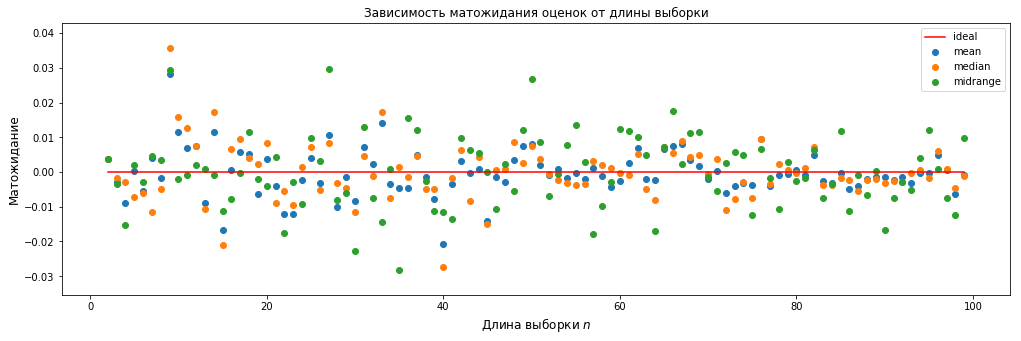

In [3]:
print('Зависимость матожидания от длины выборки')

plt.figure(figsize=(17, 5))
plt.scatter(range (2, 100), [x[0] for x in mu_data], label='mean')
plt.scatter(range (2, 100), [x[1] for x in mu_data], label='median')
plt.scatter(range (2, 100), [x[2] for x in mu_data], label='midrange')
plt.plot(range (2, 100), [MU for x in mu_data], label='ideal', color='red')
plt.title('Зависимость матожидания оценок от длины выборки')
plt.xlabel('Длина выборки $n$', fontsize=12)
plt.ylabel('Матожидание', fontsize=12)
plt.legend(loc='best')
plt.show()

Зависимость дисперсии от длины выборки


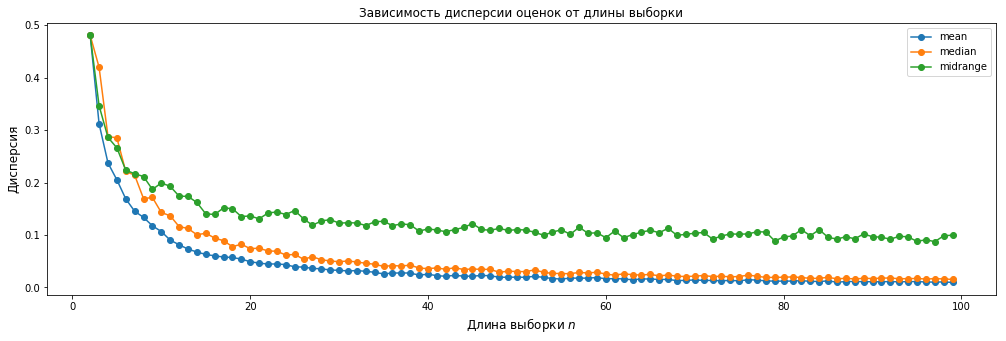

In [4]:
print('Зависимость дисперсии от длины выборки')

plt.figure(figsize=(17, 5))
plt.plot(range (2, 100), [x[0] for x in var_data], label='mean', marker='o')
plt.plot(range (2, 100), [x[1] for x in var_data], label='median', marker='o')
plt.plot(range (2, 100), [x[2] for x in var_data], label='midrange', marker='o')
plt.title('Зависимость дисперсии оценок от длины выборки')
plt.xlabel('Длина выборки $n$', fontsize=12)
plt.ylabel('Дисперсия', fontsize=12)
plt.legend(loc='best')
plt.show()

Мы знаем, что квадратичная ошибка расскладывается на шум, смещение и разброс, то есть:
$$
\mathbb{E}\left[ (y-\hat{y})^2 \right] = \left(\mathbb{E}[y] - \mathbb{E}[\hat{y}]\right)^2 + \mathbb{D}[y] + \mathbb{D}[\hat{y}]
$$

В нашем случае мы изменяем только первое и третье слагаемое, а второе для всех случаев одинаковое. Тогда график ниже соотвествует зависимости квадратичной ошибки от длины выборки, быть может только со смещением, но т.к. мы сравниваем какая лучше это не имеет значения.

Зависимость квадратичной ошибки от длины выборки


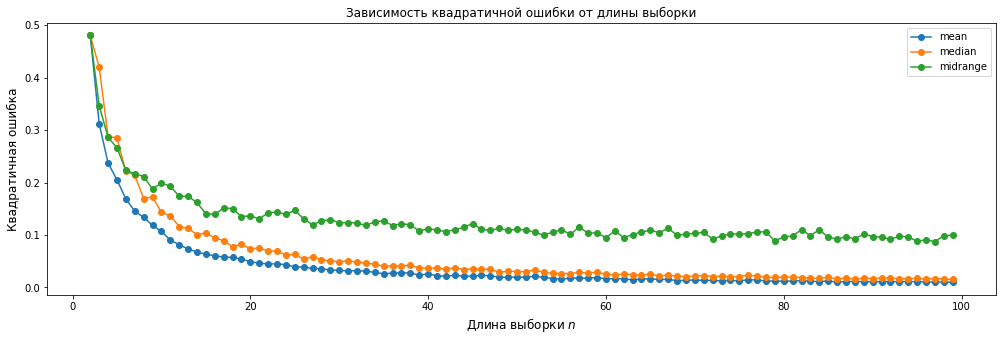

In [5]:
print('Зависимость квадратичной ошибки от длины выборки')


plt.figure(figsize=(17, 5))

plt.plot(range (2, 100), [mu_data[i-2][0]**2 + var_data[i-2][0] for i in range(2,100) ], label='mean', marker='o')
plt.plot(range (2, 100), [mu_data[i-2][1]**2 + var_data[i-2][1] for i in range(2,100) ], label='median', marker='o')
plt.plot(range (2, 100), [mu_data[i-2][2]**2 + var_data[i-2][2] for i in range(2,100) ], label='midrange', marker='o')

plt.title('Зависимость квадратичной ошибки от длины выборки')
plt.xlabel('Длина выборки $n$', fontsize=12)
plt.ylabel('Квадратичная ошибка', fontsize=12)
plt.legend(loc='best')
plt.show()

По графику видно, что наилучшую квадратичную ошибку (то есть наименьшую) имеет оценка `mean`, следующее идёт `median`,  а самую худшую -- `midrange`.

Соответсвенно, в графике еще выше, который _Зависимость дисперсии от длины выборки_, видно, что наименьшую дисперсию имеет оценка `mean`, а наибольшуюю -- `midrange`.

Очевидно, что для минимизации квадратичной ошибки надо использовать `mean`.

3.
**РАВНОМЕРНОЕ РАСПРЕДЛЕНИЕ**

Теперь необходимо провести аналогичный анализ для равномерного распередления на $[-1, 1]$, для этого воспользуемся `np.random.uniform`.

In [6]:
def generation_uniform(number_of_datas=10000, n=N):
    data = np.random.uniform(-1, 1, (number_of_datas, n))
    Mean_arr = np.mean(data, axis=1)
    Median_arr = np.median(data, axis=1)
    Midrange_arr = 0.5 * ( np.max(data, axis=1) + np.min(data, axis=1) )
    return (Mean_arr, Median_arr, Midrange_arr)

print('### TASK 3 ###')

var_data_uniform = []
mu_data_uniform = []
for i in range(2, 100):
    generated = generation_uniform(number_of_datas=1000, n=i)
    var_data_uniform.append( tuple(map(np.var, generated)) )
    mu_data_uniform.append( tuple(map(np.mean, generated)) )

print('Дисперсия:')
for mmm in var_data_uniform:
    print('Dmean={} \t Dmedian={} \t Dmidrange={}'.format(*mmm))
    
print('\n МатОжижание:')
for mmm in mu_data_uniform:
    print('Emean={} \t Emedian={} \t Emidrange={}'.format(*mmm))

### TASK 3 ###
Дисперсия:
Dmean=0.162959944815545 	 Dmedian=0.162959944815545 	 Dmidrange=0.162959944815545
Dmean=0.10722284990639855 	 Dmedian=0.20189124854282772 	 Dmidrange=0.09615062197064816
Dmean=0.08624663795619453 	 Dmedian=0.13531120287510712 	 Dmidrange=0.06996724461823507
Dmean=0.06531309015336244 	 Dmedian=0.13851932797067903 	 Dmidrange=0.04831692310294372
Dmean=0.05460769653878201 	 Dmedian=0.10584646236044255 	 Dmidrange=0.03341144427750809
Dmean=0.047915535301093055 	 Dmedian=0.11060837218079073 	 Dmidrange=0.02837316401225791
Dmean=0.04205809327416777 	 Dmedian=0.09198320987414857 	 Dmidrange=0.021636501984393063
Dmean=0.037611204453581036 	 Dmedian=0.0906682641981326 	 Dmidrange=0.01729176391719634
Dmean=0.032057073481368235 	 Dmedian=0.07070165367755783 	 Dmidrange=0.014403408083491968
Dmean=0.027183202353123933 	 Dmedian=0.07234741237422491 	 Dmidrange=0.011458813739382432
Dmean=0.028801792890311654 	 Dmedian=0.06625268117406927 	 Dmidrange=0.011596219602443487
Dmea

Зависимость матожидания от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*


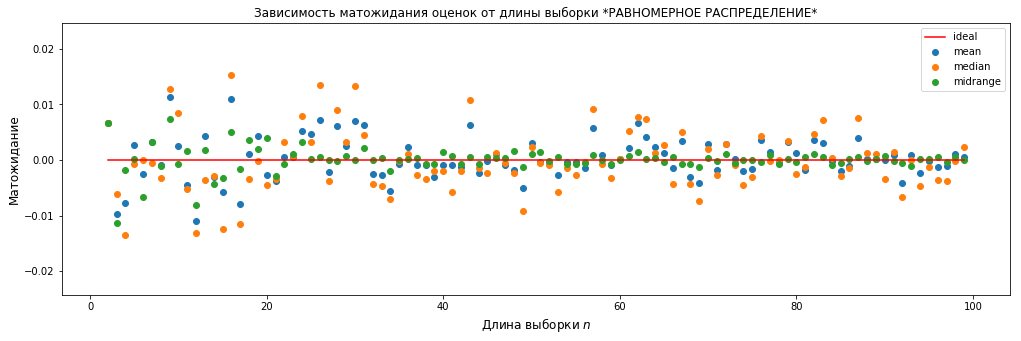

In [7]:
print('Зависимость матожидания от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*')

plt.figure(figsize=(17, 5))
plt.scatter(range (2, 100), [x[0] for x in mu_data_uniform], label='mean')
plt.scatter(range (2, 100), [x[1] for x in mu_data_uniform], label='median')
plt.scatter(range (2, 100), [x[2] for x in mu_data_uniform], label='midrange')
plt.plot(range (2, 100), [MU for x in mu_data_uniform], label='ideal', color='red')
plt.title('Зависимость матожидания оценок от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*')
plt.xlabel('Длина выборки $n$', fontsize=12)
plt.ylabel('Матожидание', fontsize=12)
plt.legend(loc='best')
plt.show()

Зависимость дисперсии от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*


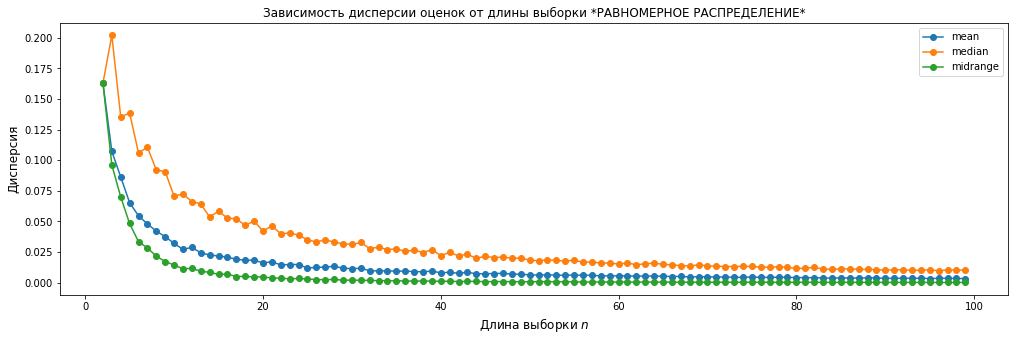

In [8]:
print('Зависимость дисперсии от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*')

plt.figure(figsize=(17, 5))
plt.plot(range (2, 100), [x[0] for x in var_data_uniform], label='mean', marker='o')
plt.plot(range (2, 100), [x[1] for x in var_data_uniform], label='median', marker='o')
plt.plot(range (2, 100), [x[2] for x in var_data_uniform], label='midrange', marker='o')
plt.title('Зависимость дисперсии оценок от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*')
plt.xlabel('Длина выборки $n$', fontsize=12)
plt.ylabel('Дисперсия', fontsize=12)
plt.legend(loc='best')
plt.show()

Зависимость квадратичной ошибки от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*


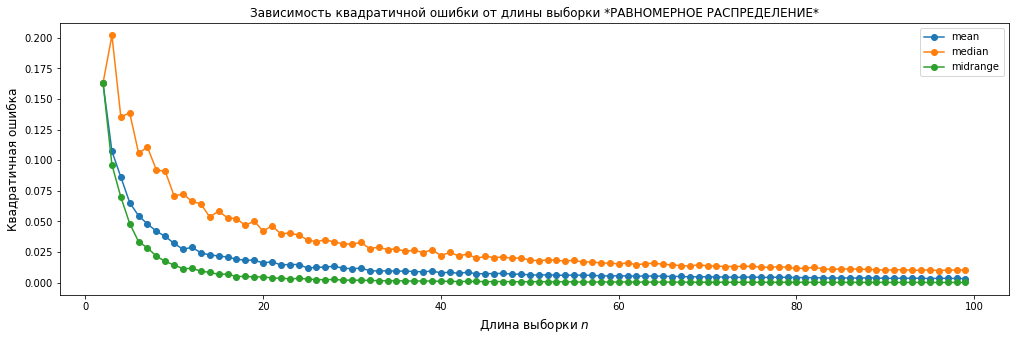

In [9]:
print('Зависимость квадратичной ошибки от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*')


plt.figure(figsize=(17, 5))

plt.plot(range (2, 100), [mu_data_uniform[i-2][0]**2 + var_data_uniform[i-2][0] for i in range(2,100) ], label='mean', marker='o')
plt.plot(range (2, 100), [mu_data_uniform[i-2][1]**2 + var_data_uniform[i-2][1] for i in range(2,100) ], label='median', marker='o')
plt.plot(range (2, 100), [mu_data_uniform[i-2][2]**2 + var_data_uniform[i-2][2] for i in range(2,100) ], label='midrange', marker='o')

plt.title('Зависимость квадратичной ошибки от длины выборки *РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ*')
plt.xlabel('Длина выборки $n$', fontsize=12)
plt.ylabel('Квадратичная ошибка', fontsize=12)
plt.legend(loc='best')
plt.show()

Для равмномерного распределение картина остоит иначе, теперь наименьшую дисперсию и ошибку имеет оценка `midrange`, а наибольшую -- `median`.

Различие нормальной и равномерной выборки в том, что при увеличении количества точек появляются большее количество точек далёких от центра.
То есть в случае нормального распредления появляется всё больше точек далеких от пика, а для равномерного распределение эти точки ограничены сверху и снизу, в силу этого при увеличении количества точек минимум и максимум стремится к $-1$ и $1$, соответсвенно. А это уменьшает ошибку `midrange`.
А в случае нормального распределения они ничем не ограничены из-за чего возникают некоторые биения (это хорошо видно на графике _Зависимость квадратичной ошибки от длины выборки_, там зелёная кривая прыгает вверх и вниз).

Для равномерного распределения наиболее "выгодно" использовать оценку `midrange`, но стоит отметить, что оценка `mean` при увеличении количества данных становится близка к ней.

### Задача 4 (10 баллов)
Рассмотрим случайную величину $Y$, имеющую плотность $p(y)$, которую мы будем считать известной функцией. Мы хотим подобрать такую величину $\hat y \in \mathbb R$, чтобы матожидание функции потерь $\mathbb E_{y\sim Y} L(y, \hat y)$ было минимальным. Пусть $L(y, \hat y)=|y-\hat y|$. Выразить оптимальное $\hat y$ через функцию $p$.

**Решение**

Функция потерь $L(y, \hat{y}) = | y - \hat{y} |$, тогда для минимизации мат.ожидания этой функции найдем производную:
$$
\left( \mathbb{E}_{y\sim Y} \left[L(y, \hat{y})\right] \right) ^\prime =
\left( \int_{-\infty}^{+\infty} |y-\hat{y}| p(y) dy \right)^\prime = 
\left(
\int_{-\infty}^{\hat{y}} (y-\hat{y}) p(y) dy + \int_{-\hat{y}}^{+\infty} - (y-\hat{y}) p(y) dy
\right)^\prime = 
\left(
    \int_{-\infty}^{\hat{y}} \hat{y} p(y) dy 
    - \int_{-\infty}^{\hat{y}} y p(y) dy 
    + \int_{-\hat{y}}^{+\infty} y p(y) dy 
    - \int_{-\hat{y}}^{+\infty} \hat{y} p(y) dy
\right)^\prime =
    \left( 
        \hat{y} p(\hat{y}) - \int_{-\hat{y}}^{+\infty}  p(y) dy
    \right) +
    \left( 
        \hat{y} p(\hat{y}) + \int_{-\infty}^{\hat{y}}  p(y) dy
    \right) -
    2 \hat{y} p(\hat{y}) = \int_{-\infty}^{\hat{y}}  p(y) dy  - \int_{-\hat{y}}^{+\infty}  p(y) dy = 0
$$
Получаем, что $\int_{-\infty}^{\hat{y}}  p(y) dy = \int_{-\hat{y}}^{+\infty}  p(y) dy$ такая $\hat{y}$ чтобы М.О. функции потерь было минимальным, но это означет, что **$\hat{y}$ -- медиана**. 

### Задача 5 (12 баллов)
Пусть дана выборка $x_1, \ldots, x_n$, все $x_i \in \mathbb R$ распределены как случайная величина $X$ и независимы в совокупности, $\mathbb E[X]<\infty$, $\mathbb D[X]<\infty$. Для фиксированного вектора $w\in \mathbb R^n$ рассмотрим функцию
$$\varphi_w(x)=\langle w, x \rangle,$$
где $\langle w, x \rangle$ — стандартное скалярное произведение (скалярное произведение, записанное в ортонормированном базисе).

1. При каком условии на $w$ эта функция будет несмещённой оценкой для $\mathbb E[X]$?
2. Среди всех $w$, при которых $\varphi_w(x)$ является несмещённой оценкой для $\mathbb E[X]$, найти такое, при котором дисперсия $\varphi_w(x)$ будет наименьшей. (Подсказка: вам понадобятся множители Лагранжа.)

**Решение**

1. 
Оценка несмещенная, если она "оставляет" на месте мат.ожидание, то есть $\mathbb{E}[\sum w_i x_i] = \mathbb{E}[X]$.
Тогда давайте преобразуем и выразим условие на $w$:
$$
    \mathbb{E}[<w, x>] = \mathbb{E}[\sum_{i=1}^n w_i x_i] = \sum_{i=1}^n \left( \mathbb{E}[w_i x_i] \right) =
    = \sum_{i=1}^n w_i \mathbb{E}[x_i] = \mathbb{E}[X] \cdot \sum_{i=1}^n w_i = \mathbb{E}[X] \quad \Rightarrow \quad
    \sum_{i=1}^n w_i = 1
$$
Получаем, что оценка несмещенная, если $\sum_{i=1}^n w_i = 1$

2. 
Минизируем дисперсию, для этого выразим её $\mathbb{D} [\varphi_w(x)] = \mathbb{D} [X] \sum w_i^2$, где суммирование производится от $1$ до $n$ (дальше везде будем подразумевать именно такое сумирование, если не написано иначе).

Ищем множители Лагранжа, пусть функция $\Lambda = \mathbb{D}[X] \sum w_i^2 + \lambda (\sum w_i - 1)$.
Тогда производные имеют вид:
$$ 
\frac{d}{d w_i} = 2 w_i \mathbb{D}[X] + \lambda \quad \Rightarrow \quad w_i = \frac{-\lambda}{2\mathbb{D}[X]}
$$
Но т.к. оценка несмещенная сумма $w_i$ должна быть равна единицы, следовательно:
$$
\frac{-n\lambda}{2\mathbb{D}[X]} = 1 \quad \Rightarrow \quad \lambda = \frac{-2\mathbb{D}[X]}{n} \quad \Rightarrow \quad w_i = \frac{1}{n}
$$
Получается, что наименьшая диспресия несмещенной оценки при $w = \left( \dfrac{1}{n}, \ldots, \dfrac{1}{n} \right)$.

### Задача 6 (10 баллов)
Рассмотрим задачу регрессии с одномерным пространством признаков. Пусть
истинный закон генерирования данных описывается следующим образом: все $x_i$
фиксированы и заданы так: $x_i=i-3$, $i=1, \ldots, 5$, а $y_i$ являются
случайными величинами:
$$y_i = |x_i| + \varepsilon_i,$$ где все $\varepsilon_i$ независимы, $\mathbb
E[\varepsilon_i]=0$, $\mathbb D[\varepsilon_i]=4$. Пусть $f_k(x)$
— предсказание метода $k$ ближайших соседей в точке $x$. Найти ожидаемую
квадратичную ошибку предсказания в точке $x=0$ для $k=3$.
Представить её в виде суммы шума, смещения и разброса.


**Решение**

Предсказание из условие определяется функцией $f_k(x)$, тогда пусть $\hat{y} = f_3(0) = \frac{1}{3} (4+ \varepsilon_2 + \varepsilon_4 + \varepsilon_5)$. 

Т.к. $\mathbb{E}[\varepsilon_i] = 0$, а $\mathbb{D}[\varepsilon_i] = \mathbb{E}[\varepsilon^2_i] + \mathbb{E}[\varepsilon_i] = 4$, тогда $\mathbb{E}[\varepsilon^2_i] = 4$, что понадобится нам далее.

Теперь посчитаем М.О. квадратичной ошибки ( [аналогично примеру](http://math-info.hse.ru/math-ml/chapter/label/chap:4:bias-variance/#label_section_number_3_5) ):
$$
\mathbb{E}\left[ (y - \hat{y})^2 \right] = \mathbb{E}\left[ (\varepsilon_3 - \frac{1}{3}(4+ \varepsilon_2 + \varepsilon_4 + \varepsilon_5) )^2 \right] = 
\mathbb{E}\left[
            \varepsilon _3 ^2 + \frac{16}{9} + \frac{1}{9}(\varepsilon _2 ^2+ \varepsilon _4 ^2+ \varepsilon _5 ^2)
        \right] = 
            4 + \frac{16}{9} + \frac{4\cdot3}{9} = \frac{64}{9}
$$
Считаем шум, смещение и разброс:
- $\mathbb{D}[y_3] = \mathbb{D}[\varepsilon_3] = 4 $
- $\mathbb{D}[f_3(0)] = \mathbb{D}\left[\frac{1}{3} (4+ \varepsilon_2 + \varepsilon_4 + \varepsilon_5)\right] = \frac{1}{9}( \mathbb{D}[\varepsilon_2]+\mathbb{D}[\varepsilon_4]+\mathbb{D}[\varepsilon_5] ) = \frac{4}{3}$
- $\left(\mathbb{E}[y_3] - \mathbb{E}[f_3(0)]\right)^2 = \left(
\mathbb{E}[\varepsilon_3] - \mathbb{E}\left[ \frac{1}{3} (4+ \varepsilon_2 + \varepsilon_4 + \varepsilon_5) \right]
\right)^2 = \left(\frac{4}{3}\right)^2 = \frac{16}{9}$

От сюда получаем, что ожидаемая квадратичная ошибка в разложении на шум, смещение и разброс имеет вид:
$$
\mathbb{E}\left[ (y - \hat{y})^2 \right] = 4 + \frac{4}{3}+\frac{16}{9}
$$